<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-processing-VDJdb" data-toc-modified-id="Pre-processing-VDJdb-1">Pre-processing VDJdb</a></span><ul class="toc-item"><li><span><a href="#1.-Load-the-packages-and-data" data-toc-modified-id="1.-Load-the-packages-and-data-1.1">1. Load the packages and data</a></span></li><li><span><a href="#2.-Data-describtion" data-toc-modified-id="2.-Data-describtion-1.2">2. Data describtion</a></span></li><li><span><a href="#3.-Data-wrangling" data-toc-modified-id="3.-Data-wrangling-1.3">3. Data wrangling</a></span><ul class="toc-item"><li><span><a href="#3.1-Remove-columns" data-toc-modified-id="3.1-Remove-columns-1.3.1">3.1 Remove columns</a></span></li><li><span><a href="#3.2-Null-values" data-toc-modified-id="3.2-Null-values-1.3.2">3.2 Null values</a></span></li><li><span><a href="#3.3-Unique-values" data-toc-modified-id="3.3-Unique-values-1.3.3">3.3 Unique values</a></span></li><li><span><a href="#3.4-complex.id" data-toc-modified-id="3.4-complex.id-1.3.4">3.4 complex.id</a></span></li></ul></li><li><span><a href="#4.-Inference" data-toc-modified-id="4.-Inference-1.4">4. Inference</a></span><ul class="toc-item"><li><span><a href="#4.1-TCRdist3" data-toc-modified-id="4.1-TCRdist3-1.4.1">4.1 TCRdist3</a></span></li><li><span><a href="#4.2-GLIPH" data-toc-modified-id="4.2-GLIPH-1.4.2">4.2 GLIPH</a></span></li><li><span><a href="#4.3-GIANA" data-toc-modified-id="4.3-GIANA-1.4.3">4.3 GIANA</a></span></li></ul></li></ul></li><li><span><a href="#Task3" data-toc-modified-id="Task3-2">Task3</a></span></li><li><span><a href="#1.-TCRdist" data-toc-modified-id="1.-TCRdist-3">1. TCRdist</a></span><ul class="toc-item"><li><span><a href="#1.1-Load-the-package" data-toc-modified-id="1.1-Load-the-package-3.1">1.1 Load the package</a></span></li><li><span><a href="#1.2-Format-the-data" data-toc-modified-id="1.2-Format-the-data-3.2">1.2 Format the data</a></span><ul class="toc-item"><li><span><a href="#1.2.1-Add-'clone_id'" data-toc-modified-id="1.2.1-Add-'clone_id'-3.2.1">1.2.1 Add 'clone_id'</a></span></li><li><span><a href="#1.2.2-Duplicate-complex.id-0-records" data-toc-modified-id="1.2.2-Duplicate-complex.id-0-records-3.2.2">1.2.2 Duplicate complex.id 0 records</a></span></li><li><span><a href="#1.2.3-Add-'count'" data-toc-modified-id="1.2.3-Add-'count'-3.2.3">1.2.3 Add 'count'</a></span></li><li><span><a href="#1.2.4-Select-the-columns-for-TCRdist-input" data-toc-modified-id="1.2.4-Select-the-columns-for-TCRdist-input-3.2.4">1.2.4 Select the columns for TCRdist input</a></span></li><li><span><a href="#1.2.5-Fill-null-values-and-pivot-wider" data-toc-modified-id="1.2.5-Fill-null-values-and-pivot-wider-3.2.5">1.2.5 Fill null values and pivot wider</a></span></li><li><span><a href="#1.2.6-Select-'organism':" data-toc-modified-id="1.2.6-Select-'organism':-3.2.6">1.2.6 Select 'organism':</a></span></li><li><span><a href="#1.2.7-Formatted-input" data-toc-modified-id="1.2.7-Formatted-input-3.2.7">1.2.7 Formatted input</a></span></li></ul></li><li><span><a href="#1.3-Similarity/Distance-matrix" data-toc-modified-id="1.3-Similarity/Distance-matrix-3.3">1.3 Similarity/Distance matrix</a></span><ul class="toc-item"><li><span><a href="#1.3.1-Different-inputs" data-toc-modified-id="1.3.1-Different-inputs-3.3.1">1.3.1 Different inputs</a></span></li><li><span><a href="#1.3.2-Define-functions" data-toc-modified-id="1.3.2-Define-functions-3.3.2">1.3.2 Define functions</a></span></li><li><span><a href="#1.3.3-Alpha-and-beta-chains-separately" data-toc-modified-id="1.3.3-Alpha-and-beta-chains-separately-3.3.3">1.3.3 Alpha and beta chains separately</a></span></li><li><span><a href="#1.3.4-Pairwise" data-toc-modified-id="1.3.4-Pairwise-3.3.4">1.3.4 Pairwise</a></span></li></ul></li></ul></li></ul></div>

# Pre-processing VDJdb

## 1. Load the packages and data

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rawdata = pd.read_excel('vdjdb.xlsx')

In [3]:
rawdata.head(3)

complex.id gene                  cdr3       v.segm      j.segm  \
0           1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1           1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
2           0  TRB   CASSFEAGQGFFSNQPQHF    TRBV13*01  TRBJ1-5*01   

       species     mhc.a mhc.b mhc.class antigen.epitope  ... antigen.species  \
0  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL  ...           HIV-1   
1  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL  ...           HIV-1   
2  HomoSapiens  HLA-B*08   B2M      MHCI        FLKEKGGL  ...           HIV-1   

    reference.id                                             method  \
0  PMID:15596521  {"frequency": "", "identification": "tetramer-...   
1  PMID:15596521  {"frequency": "", "identification": "tetramer-...   
2  PMID:15596521  {"frequency": "", "identification": "tetramer-...   

                                                meta  \
0  {"cell.subset": "CD8+", "clone.id": "", "donor...   
1  {"cell.subset": "CD8+", "clone.id": "", "donor...   
2  {"cell.subset": "CD8+", "clone.id": "", "donor...   

                                             cdr3fix vdjdb.score  web.method  \
0  {"cdr3": "CIVRAPGRADMRF", "cdr3_old": "CIVRAPG...           2        sort   
1  {"cdr3": "CASSYLPGQGDHYSNQPQHF", "cdr3_old": "...           2        sort   
2  {"cdr3": "CASSFEAGQGFFSNQPQHF", "cdr3_old": "C...           2        sort   

  web.method.seq web.cdr3fix.nc web.cdr3fix.unmp  
0         sanger             no               no  
1         sanger             no               no  
2         sanger             no               no  

[3 rows x 21 columns]

In [4]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   complex.id        92771 non-null  int64 
 1   gene              92771 non-null  object
 2   cdr3              92771 non-null  object
 3   v.segm            92670 non-null  object
 4   j.segm            91626 non-null  object
 5   species           92771 non-null  object
 6   mhc.a             92771 non-null  object
 7   mhc.b             92771 non-null  object
 8   mhc.class         92771 non-null  object
 9   antigen.epitope   92771 non-null  object
 10  antigen.gene      92709 non-null  object
 11  antigen.species   92771 non-null  object
 12  reference.id      91260 non-null  object
 13  method            92771 non-null  object
 14  meta              92771 non-null  object
 15  cdr3fix           92771 non-null  object
 16  vdjdb.score       92771 non-null  int64 
 17  web.method  

In [5]:
# dtype_df = pd.DataFrame(columns=['Column', 'Data Type'])

# for column in rawdata.columns:
#     data_type = type(rawdata[column][0]).__name__
#     dtype_df = pd.concat([dtype_df, pd.DataFrame({'Column': [column], 'Data Type': [data_type]})], ignore_index=True)

# print(dtype_df)

## 2. Data describtion

From the data type of each column we can see that all are of type **str** except *conplex.id* and *vdjdb.score* which are of type **int**.

The data contains a total of 21 columns, we can make an initial filter by the type and meaning of each column.

In [6]:
rawdata_info = pd.read_excel('vdjdb.xlsx', sheet_name='Sheet2')

In [7]:
def display_left_aligned(df):
    style = df.style.set_properties(**{
        'text-align': 'left',
        'white-space': 'pre-wrap',
    })

    style.set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'left')]
    }])

    display(style)

In [8]:
display_left_aligned(rawdata_info)

## 3. Data wrangling

### 3.1 Remove columns

Some of the columns contain specific information about the literature sources (reference.id), sequencing methods (method, web.method.seq), collection method (web.method) etc., some of which are related to how **vdjdb.score** is calculated.

Therefore we first remove these columns. Deleted columns are as follows: 
-  reference.id
-  method
-  meta
-  cdr3fix
-  web.method  
-  web.method.seq
-  web.cdr3fix.nc
-  web.cdr3fix.unmp

In [9]:
data = rawdata.iloc[:, list(range(0, 12)) + [16]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92771 entries, 0 to 92770
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   complex.id       92771 non-null  int64 
 1   gene             92771 non-null  object
 2   cdr3             92771 non-null  object
 3   v.segm           92670 non-null  object
 4   j.segm           91626 non-null  object
 5   species          92771 non-null  object
 6   mhc.a            92771 non-null  object
 7   mhc.b            92771 non-null  object
 8   mhc.class        92771 non-null  object
 9   antigen.epitope  92771 non-null  object
 10  antigen.gene     92709 non-null  object
 11  antigen.species  92771 non-null  object
 12  vdjdb.score      92771 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.2+ MB


### 3.2 Null values

The colums v.segm and j.segm have 101, 1145 null values respectively. Due to the fact 

In [10]:
data.isnull().sum()

complex.id            0
gene                  0
cdr3                  0
v.segm              101
j.segm             1145
species               0
mhc.a                 0
mhc.b                 0
mhc.class             0
antigen.epitope       0
antigen.gene         62
antigen.species       0
vdjdb.score           0
dtype: int64

In [11]:
null_count = data.isnull().any(axis=1).sum()
print(f"The number of null rows: {null_count}")

The number of null rows: 1221


### 3.3 Unique values

Then, we check the unique value counts in the remaining columns.

In [12]:
def plot_unique_value_counts(df, wid):
    unique_counts = df.nunique()
    showplt = 1
    ##showplt = input('If you want to show a bar chart, please input 1.\nElse, input 0:\n')
    if showplt:
        plt.figure(figsize=(6, 4))
        plt.bar(range(len(unique_counts)),unique_counts, width=wid)
        plt.title('Unique Value Counts')
        plt.xlabel('Columns')
        plt.ylabel('Unique Value Counts')
        plt.xticks(range(len(unique_counts)), unique_counts.index, rotation=45)

    for i, v in enumerate(unique_counts):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

    return unique_counts

complex.id         30595
gene                   2
cdr3               68994
v.segm               224
j.segm                71
species                3
mhc.a                119
mhc.b                 45
mhc.class              2
antigen.epitope     1169
antigen.gene         268
antigen.species       42
vdjdb.score            4
dtype: int64

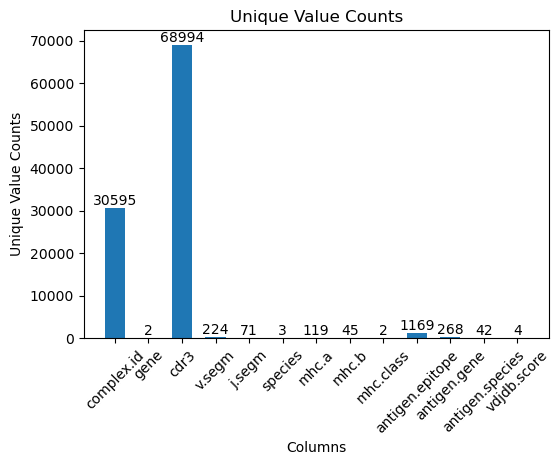

In [13]:
plot_unique_value_counts(data,0.6)

cdr3               68994
antigen.epitope     1169
dtype: int64

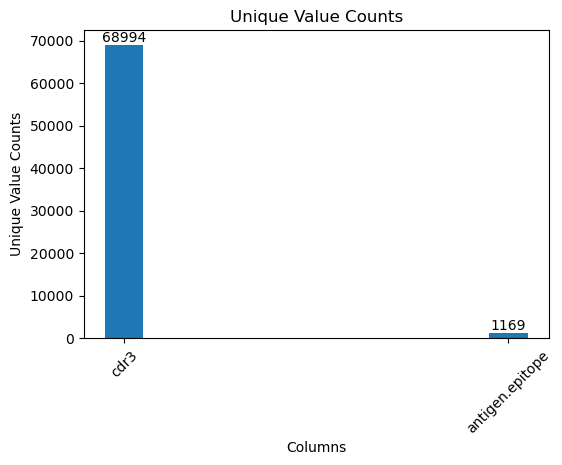

In [14]:
plot_unique_value_counts(data[['cdr3','antigen.epitope']],0.1)

### 3.4 complex.id

Due to the fact that TCR alpha and beta chain records belonging to the same T-cell clone, and in case the complex.id is equal to zero, a record doesn't have either alpha or beta chain, we count both zero and non-zero values, and then check if the non-zero values occur twice.

In [15]:
print(f"1. The number of rows in the VDJdb: {len(data)}\n"
      f"   The number of null rows: {null_count}\n"
      f"   The number of duplicate rows: {len(data)-data.drop_duplicates().shape[0]}")

zeros = data[data['complex.id'] == 0]
zeros_count = zeros['complex.id'].count()
zeros_a_count = zeros[zeros['gene'] == 'TRA']['gene'].count()
zeros_b_count = zeros[zeros['gene'] == 'TRB']['gene'].count()
zeros_unique_count = zeros.drop_duplicates().shape[0]
zeros_null = zeros.isnull().any(axis=1).sum()
print("\n2. The zero complex.id info:"
      f"\n   The number of zero complex.id: {zeros_count}"
      f"\n   The number of the alpha chain: {zeros_a_count}"
      f"\n   The number of the beta chain: {zeros_b_count}"
      f"\n   The number of non-duplicate rows: {zeros_unique_count}"
      f"\n   The number of duplicate rows: {zeros_count-zeros_unique_count}"
      f"\n   The number of null rows: {zeros_null}")


non_zeros = data[data['complex.id'] != 0]
non_zeros_count = non_zeros['complex.id'].count()
non_zeros_pair_count = non_zeros['complex.id'].value_counts()
non_zeros_unique_count = non_zeros.drop_duplicates().shape[0]
non_zeros_null = non_zeros.isnull().any(axis=1).sum()
print("\n3. The non-zero complex.id info:"
      f"\n   The number of non-zero complex.id: {non_zeros_count}"
      f"\n   The number of non-duplicate rows: {non_zeros_unique_count}"
      f"\n   The number of duplicate rows: {non_zeros_count-non_zeros_unique_count}")

# Check if all non-zero values occur twice
pairs_check = all(non_zeros_pair_count == 2)
if pairs_check:
    print(f"\n   All non-zero values occur in pairs."
          f"\n   The number of the paired values is {len(non_zeros_pair_count)}")
else:
    print("\n   There are non-paired values among non-zero values.")

# Find non-duplicate rows with null values in non_zeros
complex_id_with_null = non_zeros.loc[non_zeros.isnull().any(axis=1), [
    'complex.id']]

print(f"\n   The number of null rows: {non_zeros_null}"
      f"\n   The number of duplicate rows with null: "
      f"{non_zeros_null-complex_id_with_null.drop_duplicates().shape[0]}")

1. The number of rows in the VDJdb: 92771
   The number of null rows: 1221
   The number of duplicate rows: 4245

2. The zero complex.id info:
   The number of zero complex.id: 31583
   The number of the alpha chain: 7455
   The number of the beta chain: 24128
   The number of non-duplicate rows: 27338
   The number of duplicate rows: 4245
   The number of null rows: 326

3. The non-zero complex.id info:
   The number of non-zero complex.id: 61188
   The number of non-duplicate rows: 61188
   The number of duplicate rows: 0

   All non-zero values occur in pairs.
   The number of the paired values is 30594

   The number of null rows: 895
   The number of duplicate rows with null: 32


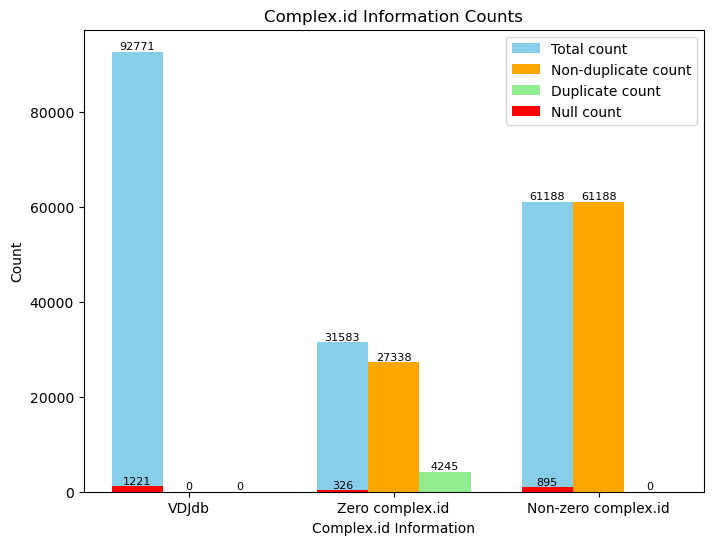

In [16]:
# complex.id info visualization
# Define data
categories = ['VDJdb', 'Zero complex.id', 'Non-zero complex.id']
counts = [len(data), zeros_count, non_zeros_count]
unique_counts = [0, zeros_unique_count, non_zeros_unique_count]
duplicate_counts = [0, zeros_count - zeros_unique_count, non_zeros_count - non_zeros_unique_count]
null_counts = [null_count, zeros_null, non_zeros_null]

# Create a bar chart
plt.figure(figsize=(8, 6))
bar_width = 0.25
index = range(len(categories))

bars1 = plt.bar(index, counts, color='skyblue', label='Total count', width=bar_width)
bars2 = plt.bar([i + bar_width for i in index], unique_counts, color='orange', label='Non-duplicate count', width=bar_width)
bars3 = plt.bar([i + 2 * bar_width for i in index], duplicate_counts, color='lightgreen', label='Duplicate count', width=bar_width)
barsnull = plt.bar(index, null_counts, color='red', label='Null count', width=bar_width)

# Add labels and legend
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % int(height), ha='center', va='bottom', fontsize=8)

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)
autolabel(barsnull)

plt.xlabel('Complex.id Information')
plt.ylabel('Count')
plt.title('Complex.id Information Counts')
plt.xticks([i + bar_width for i in index], categories)
plt.legend()

Next, we check if the paired records of non-zero complex.id have the same information for other columns expect the column 'gene'.

In [17]:
grouped = non_zeros.groupby('complex.id')

# Create an empty list to store inconsistent complex.id
not_consistent_ids = []

for group_name, group_data in grouped:
    # Compare columns 6 to 13 for consistency
    columns_to_compare = group_data.columns[5:13]
    comparison_result = group_data.iloc[0][columns_to_compare].equals(
        group_data.iloc[1][columns_to_compare])

    if not comparison_result:
        not_consistent_ids.append(group_name)

if not_consistent_ids:
    print("Inconsistent complex.id:", not_consistent_ids)
else:
    print(
        f"All {', '.join(non_zeros.columns[5:13])} columns of the same complex.id are consistent.")

All species, mhc.a, mhc.b, mhc.class, antigen.epitope, antigen.gene, antigen.species, vdjdb.score columns of the same complex.id are consistent.


## 4. Inference

Based on various measures we could use to calculate the distance/similarity matrix, the columns we choose as the input are different. Besides we should calculate these metrics for the alpha and beta chains seperately in the further study.

**Therefore we don't have to remove the lines with null values and complex.id values that are equal to 0 right away.**

### 4.1 TCRdist3

Tcrdist3 only requires 3 input columns for single chain analysis (i.e., for beta chain cdr3_b_aa and v_b_gene, j_b_gene) and 6 columns for paired chain analysis (i.e., cdr3_b_aa, v_b_gene, j_b_gene, cdr3_a_aa, v_a_gene, and j_a_gene).

A unique feature of tcrdist3 is that all of the parameters of the distance metric can be adjusted (e.g. alpha-chain only, weights on CDR loops, etc.) or completely new user-defined metrics can be provided to calculate pairwise distances. The package comes with a distance based on Needleman-Wunsch global sequence alignment and a BLOSUM62 similarity matrix, as well as the Levenshtein/edit distance, which is employed by other TCR analysis packages such as *TCRNET/VDJtools*, *ALICE*, and *GLIPH2*.

https://tcrdist3.readthedocs.io/en/latest/index.html

https://github.com/kmayerb/tcrdist3

### 4.2 GLIPH

Input TCR data are formated as follow
#CDR3b  TRBV  TRBJ  CDR3a  subject:condition count
CSARDQGGAGNQPQHF	TRBV20-1	TRBJ1-5	CAVGVGYKLSF	01/0906:MtbLys	1

All fields are tab-delimited except that subject and condition are delimited with ":". Condition can be anything such as tissue type, cell subset or treatment et al. CDR3b, TRBV, subject, and count are required. Other fields can be replaced with "NA". A demo input TCR dataset can be found at the link [TCR](http://50.255.35.37:8080/demo).

Huang, Huang, et al. "Analyzing the Mycobacterium tuberculosis immune response by T-cell receptor clustering with GLIPH2 and genome-wide antigen screening." Nature Biotechnology 38.10 (2020): 1194-1202. [Link](https://www.nature.com/articles/s41587-020-0505-4)

GLIPH1 works well on small and clean data sets. However, as data sets are becoming larger and noisier, the algorithm tends to generate large clusters of mixed specificities. [Link](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10035763/)

http://50.255.35.37:8080/tools

https://github.com/immunoengineer/gliph

### 4.3 GIANA

Input of GIANA is flexible. The first column is kept for CDR3 amino acid sequence. If TRBV allele information is enabled (by default), the second column is required to be TRBV genes. As the TCR-seq data provided by the Adaptive Biotechnologies does not comply with the IMGT format, we provide the R code (ProcessAdaptiveFile.R) to convert the Adaptive data input to standard format. In the output, GIANA inserts a column between the first and the second column as the cluster IDs. Other columns in the input data may contain any information, and will be kept in the final output.

https://github.com/s175573/GIANA

# Task3

# 1. TCRdist

## 1.1 Load the package

In [18]:
from tcrdist.repertoire import TCRrep

In [ ]:
# from tcrdist.setup_tests import list_available_zip_files  
# list_available_zip_files()
# """
# ['dash.zip',
# 'human_T_alpha_beta_sim200K.zip',
# 'vdjDB_PMID28636592.zip',
# 'sant.csv.zip',
# 'bulk.csv.zip',
# 'wiraninha_sampler.zip',
# 'ruggiero_mouse_sampler.zip',
# 'ruggiero_human_sampler.zip',
# 'britanova_human_beta_t_cb.tsv.sampler.tsv.zip',
# 'emerson_human_beta_t_cmvneg.tsv.sampler.tsv.zip',
# 'ruggiero_human_alpha_t.tsv.sampler.tsv.zip',
# 'ruggiero_human_beta_t.tsv.sampler.tsv.zip']
# """
# from tcrdist.setup_tests import download_and_extract_zip_file
# """
# Get dash.zip contents
# """
# download_and_extract_zip_file( 'dash.zip', source = "dropbox", dest = ".")
# """
# Assert that file has been downloaded
# """
# import os
# assert os.path.isfile("dash.zip")
# """
# Assert that individual files of successively been inflated
# """
# assert os.path.isfile("dash.csv")
# assert os.path.isfile("dash2.csv")
# assert os.path.isfile("dash_human.csv")
# assert os.path.isfile("dash_beta_airr.csv")

## 1.2 Format the data

### 1.2.1 Add 'clone_id'

Add a column of **'clone_id'** to all rows in data. And the value is: 

- zero complex.id records: clone_0_{number of rows in the original record}
- non-zero complex.id records: complex_1_{clone.id of the original record}

In [19]:
#data = rawdata.iloc[:, list(range(0, 12)) + [16]]

In [20]:
# Add a column of 'clone_id' to all rows
data['clone_id'] = ''

# Give the 'clone_id' record with zero complex.id the value:
# clone_0_{number of rows in the original record}
zero_complex_ids = data[data['complex.id'] == 0].index
data.loc[zero_complex_ids, 'clone_id'] = zero_complex_ids.map(
    lambda x: f'clone_0_{x}')

# Give the 'clone_id' record with non-zero complex.id the value:
# clone_1_{complex.id of the original record}
non_zero_complex_ids = data[data['complex.id'] != 0]['complex.id'].unique()
for complex_id in non_zero_complex_ids:
    indices = data[data['complex.id'] == complex_id].index
    data.loc[indices, 'clone_id'] = f'clone_1_{complex_id}'

C:\Users\86139\AppData\Local\Temp\ipykernel_11552\3019494910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clone_id'] = ''


### 1.2.2 Duplicate complex.id 0 records 

Duplicate the records with complex.id of 0 and modify the gene columns.

In [21]:
data_copy = data[data['complex.id'] == 0].copy()
data_copy['gene'] = data_copy['gene'].map({'TRA': 'TRB', 'TRB': 'TRA'})

In [22]:
# set all columns except 'complex.id', 'clone_id' and the modified 'gene' column to e,.
for col in data_copy.columns:
    if col not in ['complex.id', 'species', 'antigen.gene', 'count', 'clone_id','gene']:
        data_copy[col] = np.nan

# Merge original and copied data
data_copy = pd.concat([data, data_copy], ignore_index=True)

In [23]:
data_copy[data_copy['complex.id']!=0]

complex.id gene                  cdr3       v.segm      j.segm  \
0               1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1               1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
3               2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4               2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   
5               3  TRA           CAVKASGSRLT     TRAV2*01         NaN   
...           ...  ...                   ...          ...         ...   
92766       30592  TRB       CASSPGQGGDNEQFF   TRBV7-3*01  TRBJ2-1*01   
92767       30593  TRA          CAPQGATNKLIF  TRAV12-2*01   TRAJ32*01   
92768       30593  TRB       CASSLGAGGQETQYF   TRBV5-1*01  TRBJ2-5*01   
92769       30594  TRA        CLVGGSGGYNKLIF     TRAV4*01    TRAJ4*01   
92770       30594  TRB         CASSSTAQETQYF  TRBV11-2*01  TRBJ2-5*01   

           species           mhc.a           mhc.b mhc.class antigen.epitope  \
0      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
1      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
3      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
4      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
5      HomoSapiens        HLA-B*08             B2M      MHCI        FLKEKGGL   
...            ...             ...             ...       ...             ...   
92766  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   
92767  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   
92768  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   
92769  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   
92770  HomoSapiens  HLA-DQA1*05:01  HLA-DQB1*02:01     MHCII   PQQPFPQPEQPFP   

      antigen.gene antigen.species  vdjdb.score       clone_id  
0              Nef           HIV-1          2.0      clone_1_1  
1              Nef           HIV-1          2.0      clone_1_1  
3              Nef           HIV-1          2.0      clone_1_2  
4              Nef           HIV-1          2.0      clone_1_2  
5              Nef           HIV-1          2.0      clone_1_3  
...            ...             ...          ...            ...  
92766       Gluten           Wheat          0.0  clone_1_30592  
92767       Gluten           Wheat          2.0  clone_1_30593  
92768       Gluten           Wheat          2.0  clone_1_30593  
92769       Gluten           Wheat          0.0  clone_1_30594  
92770       Gluten           Wheat          0.0  clone_1_30594  

[61188 rows x 14 columns]

### 1.2.3 Add 'count'

Set 'count' of all rows to 1

In [24]:
data_copy['count'] = 1

### 1.2.4 Select the columns for TCRdist input

The tcrdist3 standard input is a Pandas DataFrame.

The header and first line of a typical input for a beta-chain analysis would look like this:


| subject | epitope | count | v_b_gene | j_b_gene |
|---------|---------|-------|----------|----------|
| s1      | NP      | 1     | TRBV1*01 | TRBJ1-1*01 |

| cdr3_b_aa                | cdr3_b_nucseq                                 |
|--------------------------|-----------------------------------------------|
| CACDSLGDKSSWDTRQMFF      | TGTGCCTGTGACTCGCTGGGGGATAAGAGCTCCTGGGACACCCGACAGATGTTTTTC |



- Tcrdist3 only requires 3 input columns for single chain analysis (i.e., **for beta chain cdr3_b_aa and v_b_gene, j_b_gene**) and 6 columns for paired chain analysis (i.e., **cdr3_b_aa, v_b_gene, j_b_gene, cdr3_a_aa, v_a_gene, and j_a_gene**).

- The columns **‘cdr3_a_nucseq’, ‘cdr3_b_nucseq’ are optional**, but useful to include if you wish to prevent aggregation of multiple geneically distinct clones identical at the amino acid level (see critical information below for more information).

- By default, tcrdist3 uses all supplied columns provided in the DataFrame passed to the cell_df argument to look for potentially **duplicated rows** based on the default setting (deduplicate = True). The initialization of a TCRrep instance automatically aggregates counts over duplicated rows.

- This has practical consequences. For instance, if **no subject** column is included identical clones from two or more individuals will be **combined into a single row**.

- If any columns have *missing values*, the corresponding row containing the **missing value** is excluded. Thus, do not include columns that have missing values. If you wish to retain every clonotype, adding an index column or the nucleotide sequence will prevent rows with identical amino acid sequences from being merged.

**The standard input in the dash.csv looks like this:**

In [25]:
pd.read_csv("dash.csv").head(3)

subject epitope  count     v_a_gene   j_a_gene         cdr3_a_aa  \
0  mouse_subject0050      PA      2   TRAV7-3*01  TRAJ33*01     CAVSLDSNYQLIW   
1  mouse_subject0050      PA      6  TRAV6D-6*01  TRAJ56*01  CALGDRATGGNNKLTF   
2  mouse_subject0050      PA      1  TRAV6D-6*01  TRAJ49*01    CALGSNTGYQNFYF   

                                      cdr3_a_nucseq     v_b_gene    j_b_gene  \
0           tgtgcagtgagcctcgatagcaactatcagttgatctgg  TRBV13-1*01  TRBJ2-3*01   
1  tgtgctctgggtgacagggctactggaggcaataataagctgactttt    TRBV29*01  TRBJ1-1*01   
2        tgtgctctgggctcgaacacgggttaccagaacttctatttt    TRBV29*01  TRBJ1-5*01   

           cdr3_b_aa                                      cdr3_b_nucseq  \
0  CASSDFDWGGDAETLYF  tgtgccagcagtgatttcgactggggaggggatgcagaaacgctgt...   
1       CASSPDRGEVFF               tgtgctagcagtccggacaggggtgaagtcttcttt   
2        CASTGGGAPLF                  tgtgctagcacagggggaggggctccgcttttt   

              clone_id  
0  mouse_tcr0072.clone  
1  mouse_tcr0096.clone  
2  mouse_tcr0276.clone

In [26]:
df = data_copy.iloc[:, list(range(0, 6)) + [10,12,13,14]]

In [27]:
df[df['complex.id']!=0]

complex.id gene                  cdr3       v.segm      j.segm  \
0               1  TRA         CIVRAPGRADMRF  TRAV26-1*01   TRAJ43*01   
1               1  TRB  CASSYLPGQGDHYSNQPQHF    TRBV13*01  TRBJ1-5*01   
3               2  TRA        CAVPSGAGSYQLTF    TRAV20*01   TRAJ28*01   
4               2  TRB   CASSFEPGQGFYSNQPQHF    TRBV13*01  TRBJ1-5*01   
5               3  TRA           CAVKASGSRLT     TRAV2*01         NaN   
...           ...  ...                   ...          ...         ...   
92766       30592  TRB       CASSPGQGGDNEQFF   TRBV7-3*01  TRBJ2-1*01   
92767       30593  TRA          CAPQGATNKLIF  TRAV12-2*01   TRAJ32*01   
92768       30593  TRB       CASSLGAGGQETQYF   TRBV5-1*01  TRBJ2-5*01   
92769       30594  TRA        CLVGGSGGYNKLIF     TRAV4*01    TRAJ4*01   
92770       30594  TRB         CASSSTAQETQYF  TRBV11-2*01  TRBJ2-5*01   

           species antigen.gene  vdjdb.score       clone_id  count  
0      HomoSapiens          Nef          2.0      clone_1_1      1  
1      HomoSapiens          Nef          2.0      clone_1_1      1  
3      HomoSapiens          Nef          2.0      clone_1_2      1  
4      HomoSapiens          Nef          2.0      clone_1_2      1  
5      HomoSapiens          Nef          2.0      clone_1_3      1  
...            ...          ...          ...            ...    ...  
92766  HomoSapiens       Gluten          0.0  clone_1_30592      1  
92767  HomoSapiens       Gluten          2.0  clone_1_30593      1  
92768  HomoSapiens       Gluten          2.0  clone_1_30593      1  
92769  HomoSapiens       Gluten          0.0  clone_1_30594      1  
92770  HomoSapiens       Gluten          0.0  clone_1_30594      1  

[61188 rows x 10 columns]

In [28]:
df[df['complex.id']==0]

complex.id gene                 cdr3      v.segm      j.segm  \
2                0  TRB  CASSFEAGQGFFSNQPQHF   TRBV13*01  TRBJ1-5*01   
11               0  TRB  CASSFEAGQGFFSNQPQHF   TRBV13*01  TRBJ1-5*01   
18               0  TRB  CASSFEAGQGFFSNQPQHF   TRBV13*01  TRBJ1-5*01   
25               0  TRB  CASSFEAGQGFFSNQPQHF   TRBV13*01  TRBJ1-5*01   
30               0  TRB        CASSFGVEDEQYF  TRBV7-2*01  TRBJ2-7*01   
...            ...  ...                  ...         ...         ...   
124349           0  TRB                  NaN         NaN         NaN   
124350           0  TRB                  NaN         NaN         NaN   
124351           0  TRB                  NaN         NaN         NaN   
124352           0  TRA                  NaN         NaN         NaN   
124353           0  TRA                  NaN         NaN         NaN   

            species antigen.gene  vdjdb.score       clone_id  count  
2       HomoSapiens          Nef          2.0      clone_0_2      1  
11      HomoSapiens          Nef          2.0     clone_0_11      1  
18      HomoSapiens          Nef          2.0     clone_0_18      1  
25      HomoSapiens          Nef          2.0     clone_0_25      1  
30      HomoSapiens      Gliadin          1.0     clone_0_30      1  
...             ...          ...          ...            ...    ...  
124349  HomoSapiens       Gluten          NaN  clone_0_92664      1  
124350  HomoSapiens       Gluten          NaN  clone_0_92665      1  
124351  HomoSapiens       Gluten          NaN  clone_0_92666      1  
124352  HomoSapiens       Gluten          NaN  clone_0_92667      1  
124353  HomoSapiens       Gluten          NaN  clone_0_92668      1  

[63166 rows x 10 columns]

### 1.2.5 Fill null values and pivot wider

Based on the column 'gene', we pivot the data wider so that it looks like the standard input. Meanwhile, we change the name of the columns as the TCRdist requires.

**Fill the null values in antigen.gene with the string 'empty'**

In [29]:
df['antigen.gene'].fillna('empty', inplace=True)
df.isnull().sum()

C:\Users\86139\AppData\Local\Temp\ipykernel_11552\1375095455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['antigen.gene'].fillna('empty', inplace=True)


complex.id          0
gene                0
cdr3            31583
v.segm          31684
j.segm          32728
species             0
antigen.gene        0
vdjdb.score     31583
clone_id            0
count               0
dtype: int64

In [30]:
df_wide = df.pivot_table(index=['clone_id','complex.id', 'species', 'antigen.gene', 'vdjdb.score', 'count'], columns='gene', values=[
                         'cdr3', 'v.segm', 'j.segm'], aggfunc='first').reset_index()
# df_wide.columns
df_wide.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0]
                   for col in df_wide.columns]

In [31]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62177 entries, 0 to 62176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   clone_id      62177 non-null  object 
 1   complex.id    62177 non-null  int64  
 2   species       62177 non-null  object 
 3   antigen.gene  62177 non-null  object 
 4   vdjdb.score   62177 non-null  float64
 5   count         62177 non-null  int64  
 6   cdr3_TRA      38049 non-null  object 
 7   cdr3_TRB      54722 non-null  object 
 8   j.segm_TRA    37004 non-null  object 
 9   j.segm_TRB    54622 non-null  object 
 10  v.segm_TRA    37957 non-null  object 
 11  v.segm_TRB    54713 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 5.7+ MB


In [32]:
df_wide.columns = ['clone_id', 'complex_id', 'organism', 'epitope','vdjdb_score', 'count', 'cdr3_a_aa',
                   'cdr3_b_aa', 'j_a_gene', 'j_b_gene', 'v_a_gene', 'v_b_gene']

In [33]:
len(df_wide)

62177

In [34]:
len(df_wide[df_wide['complex_id'] ==0])

31583

In [35]:
len(df_wide[df_wide['complex_id'] !=0])

30594

**Check if any rows are deleted:**

**Note**: For the initial trials, we could see that there are some rows with non-zero complex_id missing. Missing values in 'complex_id':

        [ 178,  187,  188,  189,  190,  201,  202,  203,  229,  234,  262,306,  308,  310,  314,  
        
        320,  322, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634]
        
By checking the data in the original dataset, we figured out that it's due to the null values in the 'antigen.gene' ('epitope') column. **There should not be null values in the index columns** that will be used for **pivot_table**. 


Therefore we decided to:
- fill the null values in 'antigen.gene' with the string 'empty'.
- change those 'empty' strings in the 'epitope' back to null after the pivot wide step. 

In [36]:
print(f"1. The number of rows in the pivot wide data: {len(df_wide)}\n"
      "\n2. The zero complex.id info:"
      f"\n   The number of zero complex.id in the VDJdb: {zeros_count}"
      f"\n   The number of zero complex.id in the pivot wide data: {len(df_wide[df_wide['complex_id'] ==0])}\n"
      "\n3. The non-zero complex.id info:"
      f"\n   The number of paired non-zero complex.id: {int(non_zeros_count/2)}"
      f"\n   The number of non-zero complex.id in the pivot wide data: {len(df_wide[df_wide['complex_id'] !=0])}")

1. The number of rows in the pivot wide data: 62177

2. The zero complex.id info:
   The number of zero complex.id in the VDJdb: 31583
   The number of zero complex.id in the pivot wide data: 31583

3. The non-zero complex.id info:
   The number of paired non-zero complex.id: 30594
   The number of non-zero complex.id in the pivot wide data: 30594


In [37]:
# Create a Series containing all values from 1 to 30594
all_values = pd.Series(range(1, 30595))

# Found a value that is not in the 'complex_id' column
missing_values = all_values[~all_values.isin(df_wide['complex_id'])]

print("Missing values in 'complex_id' from 1 to 30594:")
print(missing_values)

Missing values in 'complex_id' from 1 to 30594:
Series([], dtype: int64)


**Change those 'empty' strings in the 'epitope' column back to null**

In [38]:
df_wide.replace('empty', np.nan, inplace=True)

###  1.2.6 Select 'organism':

Most classes and functions in tcrdist3 require specification of an appropriate host organism. Currently **only ‘human’ or ‘mouse’ are supported**. This is required because reference TCR genes are organism specific. [link](https://tcrdist3.readthedocs.io/en/latest/inputs.html?highlight=mouse#organism)

Therefore, we obeserve the unique values in the 'organism' column.

In [39]:
df_wide['organism'].value_counts()

HomoSapiens      56985
MusMusculus       3073
MacacaMulatta     2119
Name: organism, dtype: int64

- **Homo sapiens** is the scientific name for modern humans.


- **Mus musculus** is the scientific name for the common house mouse.


- **Macaca mulatta** is the scientific name for the rhesus macaque, which is a species of monkey.


Therefore, we select only 'Homo sapiens' and 'Mus musculus', which will remove line 2073 'MacacaMulatta'. 

Also we change the names to 'modern humans' and 'mouse' respectively.

In [40]:
df_filtered = df_wide[df_wide['organism'].isin(
    ['HomoSapiens', 'MusMusculus'])].copy()

df_filtered.loc[df_filtered['organism'] ==
                'HomoSapiens', 'organism'] = 'human'
df_filtered.loc[df_filtered['organism'] ==
                'MusMusculus', 'organism'] = 'mouse'
df_filtered.head(3)

clone_id  complex_id organism epitope  vdjdb_score  count cdr3_a_aa  \
0    clone_0_100           0    human    pp65          0.0      1       NaN   
1   clone_0_1000           0    human     Gag          0.0      1       NaN   
2  clone_0_10000           0    human    pp65          0.0      1       NaN   

           cdr3_b_aa j_a_gene    j_b_gene v_a_gene    v_b_gene  
0     CASTSGSFTGELFF      NaN  TRBJ2-2*01      NaN  TRBV5-1*01  
1     CAWSLTGMNQPQHF      NaN  TRBJ1-5*01      NaN   TRBV30*01  
2  CASSQEALTGAKNIQYF      NaN  TRBJ2-4*01      NaN  TRBV4-3*01

### 1.2.7 Formatted input

In [41]:
tcrdist_input = df_filtered

# Sort by value of column 'epitope'
tcrdist_input.sort_values(by='epitope', inplace=True)

tcrdist_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60058 entries, 47584 to 54646
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   clone_id     60058 non-null  object 
 1   complex_id   60058 non-null  int64  
 2   organism     60058 non-null  object 
 3   epitope      60027 non-null  object 
 4   vdjdb_score  60058 non-null  float64
 5   count        60058 non-null  int64  
 6   cdr3_a_aa    37962 non-null  object 
 7   cdr3_b_aa    52690 non-null  object 
 8   j_a_gene     37004 non-null  object 
 9   j_b_gene     52590 non-null  object 
 10  v_a_gene     37957 non-null  object 
 11  v_b_gene     52681 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 6.0+ MB


In [42]:
alpha_input = tcrdist_input.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 10]]
beta_input = tcrdist_input.iloc[:, [0, 1, 2, 3, 4, 5, 7, 9, 11]]

In [43]:
alpha_input.head()

clone_id  complex_id organism epitope  vdjdb_score  count  \
47584  clone_1_244         244    mouse      3K          3.0      1   
44584  clone_1_217         217    mouse      3K          3.0      1   
44473  clone_1_216         216    mouse      3K          3.0      1   
47362  clone_1_242         242    mouse      3K          3.0      1   
44362  clone_1_215         215    mouse      3K          3.0      1   

           cdr3_a_aa   j_a_gene      v_a_gene  
47584  CAASRDSGQKLVF  TRAJ16*01   TRAV14-3*01  
44584     CAASDNRIFF  TRAJ31*01  TRAV14N-2*01  
44473    CAANSGTYQRF  TRAJ13*01    TRAV6-3*01  
47362   CAASKGADRLTF  TRAJ45*01   TRAV14-3*01  
44362  CALVISNTNKVVF  TRAJ34*01   TRAV6N-7*01

In [44]:
beta_input.head()

clone_id  complex_id organism epitope  vdjdb_score  count  \
47584  clone_1_244         244    mouse      3K          3.0      1   
44584  clone_1_217         217    mouse      3K          3.0      1   
44473  clone_1_216         216    mouse      3K          3.0      1   
47362  clone_1_242         242    mouse      3K          3.0      1   
44362  clone_1_215         215    mouse      3K          3.0      1   

           cdr3_b_aa    j_b_gene     v_b_gene  
47584  CASGDFWGDTLYF  TRBJ2-4*01  TRBV13-2*01  
44584  CASGDAWGYEQYF  TRBJ2-7*01  TRBV13-2*01  
44473  CASGDFWGDTLYF  TRBJ2-4*01  TRBV13-2*01  
47362  CASGDFWGDTLYF  TRBJ2-4*01  TRBV13-2*01  
44362  CASIDSSGNTLYF  TRBJ1-3*01  TRBV13-3*01

## 1.3 Similarity/Distance matrix

### 1.3.1 Different inputs

**Inputs for parwise calculation:**

In [45]:
mouse = tcrdist_input[tcrdist_input['organism'] == 'mouse']
human = tcrdist_input[tcrdist_input['organism'] == 'human']

**Inputs for separate calculation:**

In [46]:
mouse_alpha = alpha_input[alpha_input['organism'] == 'mouse']
mouse_beta = beta_input[alpha_input['organism'] == 'mouse']
human_alpha = alpha_input[alpha_input['organism'] == 'human']
human_beta = beta_input[alpha_input['organism'] == 'human']

**Delete null values:**

In [47]:
mouse = mouse.dropna()
mouse_alpha = mouse_alpha.dropna()
mouse_beta = mouse_beta.dropna()

human = human.dropna()
human_alpha = human_alpha.dropna()
human_beta = human_beta.dropna()

**Number of rows for different vdjdb scores of different inputs:**

In [48]:
# Create a Series containing the vdjdb_score distribution for each dataset
vdjdb_score_counts = {}

datasets = [mouse, mouse_alpha, mouse_beta, human, human_alpha, human_beta]
labels = ['Mouse', 'Mouse Alpha', 'Mouse Beta', 'Human', 'Human Alpha', 'Human Beta']

for dataset, label in zip(datasets, labels):
    vdjdb_score_counts[label] = dataset['vdjdb_score'].value_counts()

# Convert dictionary to DataFrame
vdjdb_score_counts_df = pd.DataFrame(vdjdb_score_counts)
vdjdb_score_counts_df = vdjdb_score_counts_df.rename_axis('vdjdb score')
vdjdb_score_counts_df

Mouse  Mouse Alpha  Mouse Beta  Human  Human Alpha  Human Beta
vdjdb score                                                                
0.0           1282         1322        1810  25710        31970       42981
1.0            834          859        1060    684         1436        4183
2.0              6            6          50    541          669        1485
3.0             59           59          81    615          647         900

In [49]:
human_01 = human[human['vdjdb_score'].isin([0, 1])]
human_23 = human[human['vdjdb_score'].isin([2, 3])]
mouse_01 = mouse[mouse['vdjdb_score'].isin([0, 1])]
mouse_23 = mouse[mouse['vdjdb_score'].isin([2, 3])]

### 1.3.2 Define functions

In [50]:
# def plot_heatmap(matrix, title):
#     plt.imshow(matrix, cmap='viridis', interpolation='nearest')
#     plt.colorbar()
#     plt.title(title)
#     plt.xlabel('Index')
#     plt.ylabel('Index')
#     plt.show()

In [51]:
# # Compute and plot distance matrix heatmap of subsets
# def calculate_and_plot_subset(subset_df, organism, chains, title_suffix):
#     # Check if subset is empty
#     if len(subset_df) == 0:
#         print(
#             f"Subset {title_suffix} is empty, skipping calculation and plotting.")
#         return

#     # Create TCRrep object
#     tr_subset = TCRrep(cell_df=subset_df,
#                        organism=organism,
#                        chains=chains,
#                        compute_distances=True,
#                        db_file='alphabeta_gammadelta_db.tsv')
#     # Setting parameters
#     if 'alpha' in chains:
#         tr_subset.kargs_a['cdr3_a_aa']['gap_penalty'] = 5
#     if 'beta' in chains:
#         tr_subset.kargs_b['cdr3_b_aa']['gap_penalty'] = 5
        
#     # Calculate distance matrix
#     tr_subset.compute_distances()
    
#     # Draw heat map
#     if 'alpha' in chains and 'beta' in chains:
#         plot_heatmap(tr_subset.pw_alpha+tr_subset.pw_beta,
#                      f'Pairwise Distance Matrix {title_suffix}')
#     else:
#         if 'alpha' in chains:
#             plot_heatmap(tr_subset.pw_alpha,
#                      f'Alpha Chain Pairwise Distance Matrix {title_suffix}')
#             plot_heatmap(tr_subset.pw_cdr3_a_aa,
#                      f'CDR3 Alpha Chain Distance Matrix {title_suffix}')
#         if 'beta' in chains:
#             plot_heatmap(tr_subset.pw_beta,
#                      f'Beta Chain Pairwise Distance Matrix {title_suffix}')
#             plot_heatmap(tr_subset.pw_cdr3_b_aa,
#                      f'CDR3 Beta Chain Distance Matrix {title_suffix}')

In [52]:
# def calculate_and_plot_subsets(original_set, organism, chains, subset_num):
#     subset_size = int(original_set.shape[0] / subset_num)  

#     for i in range(subset_num):
#         start_index = i * subset_size
#         end_index = min((i + 1) * subset_size, len(original_set))
#         subset_df = original_set.iloc[start_index:end_index]
#         title_suffix = f'Subset {i + 1}' if subset_num != 1 else ''
#         calculate_and_plot_subset(subset_df, organism, chains, title_suffix)

In [53]:
def plot_heatmap(matrix, title, ax=None):
    if ax is None:
        ax = plt.gca()
    im = ax.imshow(matrix, cmap='viridis', interpolation='nearest', origin='upper', extent=[0, matrix.shape[1], matrix.shape[0], 0])
    ax.set_title(title)
    plt.colorbar(im, ax=ax)
    ax.set_xlabel('Index')
    ax.set_ylabel('Index')

In [98]:
from matplotlib import cm

def calculate_and_plot_subset(subset_df, organism, chains, title_suffix):
    # Check if subset is empty
    if len(subset_df) == 0:
        print(
            f"Subset {title_suffix} is empty, skipping calculation and plotting.")
        return

    # Create TCRrep object
    tr_subset = TCRrep(cell_df=subset_df,
                       organism=organism,
                       chains=chains,
                       compute_distances=True,
                       db_file='alphabeta_gammadelta_db.tsv')
    # Setting parameters
    if 'alpha' in chains:
        tr_subset.kargs_a['cdr3_a_aa']['gap_penalty'] = 5
    if 'beta' in chains:
        tr_subset.kargs_b['cdr3_b_aa']['gap_penalty'] = 5
        
    # Calculate distance matrix
    tr_subset.compute_distances()
    
    # Create subplot grid
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Draw distance matrix heatmap
    if 'alpha' in chains and 'beta' in chains:
        plot_heatmap(tr_subset.pw_alpha+tr_subset.pw_beta,
                     f'Pairwise Distance Matrix {title_suffix}', ax=ax1)
    else:
        if 'alpha' in chains:
            plot_heatmap(tr_subset.pw_alpha,
                     f'Alpha Chain Pairwise Distance Matrix {title_suffix}', ax=ax1)
        if 'beta' in chains:
            plot_heatmap(tr_subset.pw_beta,
                     f'Beta Chain Pairwise Distance Matrix {title_suffix}', ax=ax1)

    # Draw epitope matrix heatmap
    epitope_labels = subset_df['epitope'].unique()
    epitope_color_dict = {epitope: i + 20 for i, epitope in enumerate(epitope_labels)}

    epitope_matrix = np.zeros((len(subset_df), len(subset_df)))
    for i, epitope1 in enumerate(subset_df['epitope']):
        for j, epitope2 in enumerate(subset_df['epitope']):
            if epitope1 == epitope2:
                epitope_matrix[i, j] = epitope_color_dict[epitope1]
    print(epitope_matrix)
    
    ax2.imshow(epitope_matrix, cmap='cividis', interpolation='nearest', origin='upper', extent=[0, epitope_matrix.shape[1], epitope_matrix.shape[0], 0])

    ax2.set_title(f'Epitope Matrix {title_suffix}')
    ax2.set_xticks(np.arange(0, len(subset_df), len(subset_df)//10))
    ax2.set_xticklabels(np.arange(0, len(subset_df), len(subset_df)//10))
    ax2.set_yticks(np.arange(0, len(subset_df), len(subset_df)//10))
    ax2.set_yticklabels(np.arange(0, len(subset_df), len(subset_df)//10))
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Index')

    # Adjust layout to prevent overlap of labels
    plt.subplots_adjust(wspace=0.5)

    # Adjust layout
    plt.tight_layout()

In [99]:
def calculate_and_plot_subsets(original_set, organism, chains, subset_num):
    subset_size = int(original_set.shape[0] / subset_num)  

    for i in range(subset_num):
        start_index = i * subset_size
        end_index = min((i + 1) * subset_size, len(original_set))
        subset_df = original_set.iloc[start_index:end_index]
        title_suffix = f'Subset {i + 1}' if subset_num != 1 else ''
        calculate_and_plot_subset(subset_df, organism, chains, title_suffix)

### 1.3.3 Alpha and beta chains separately

In [100]:
human_alpha_01 = human_alpha[human_alpha['vdjdb_score'].isin([0, 1])]
human_alpha_23 = human_alpha[human_alpha['vdjdb_score'].isin([2, 3])]
human_beta_01 = human_beta[human_beta['vdjdb_score'].isin([0, 1])]
human_beta_23 = human_beta[human_beta['vdjdb_score'].isin([2, 3])]

mouse_alpha_01 = mouse_alpha[mouse_alpha['vdjdb_score'].isin([0, 1])]
mouse_alpha_23 = mouse_alpha[mouse_alpha['vdjdb_score'].isin([2, 3])]
mouse_beta_01 = mouse_beta[mouse_beta['vdjdb_score'].isin([0, 1])]
mouse_beta_23 = mouse_beta[mouse_beta['vdjdb_score'].isin([2, 3])]

In [ ]:
mouse_alpha_01

[[20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 23. 23. 23.]
 [ 0.  0.  0. ... 23. 23. 23.]
 [ 0.  0.  0. ... 23. 23. 23.]]
[[20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 21. 21. 21.]
 [ 0.  0.  0. ... 21. 21. 21.]
 [ 0.  0.  0. ... 21. 21. 21.]]
[[20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 22. 22. 22.]
 [ 0.  0.  0. ... 22. 22. 22.]
 [ 0.  0.  0. ... 22. 22. 22.]]
[[20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]
 ...
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]
 [20. 20. 20. ... 20. 20. 20.]]
[[20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 21. 21. 21.]
 [ 0.  0.  0. ... 21. 21. 21.]
 [ 0.  0.  0. ... 21. 21. 21.]]


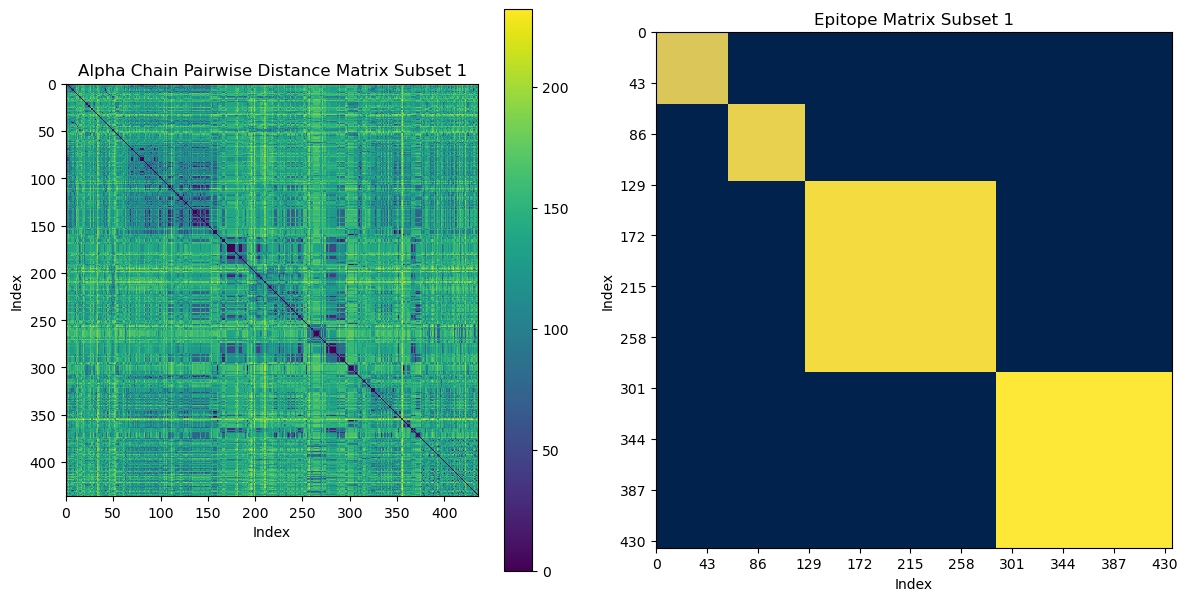

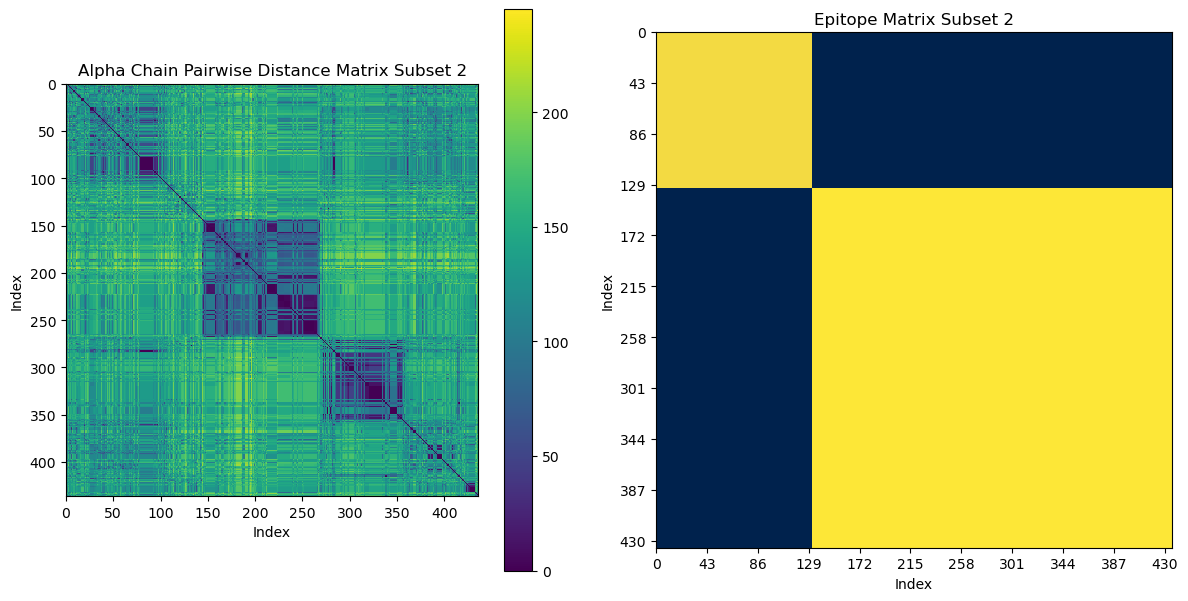

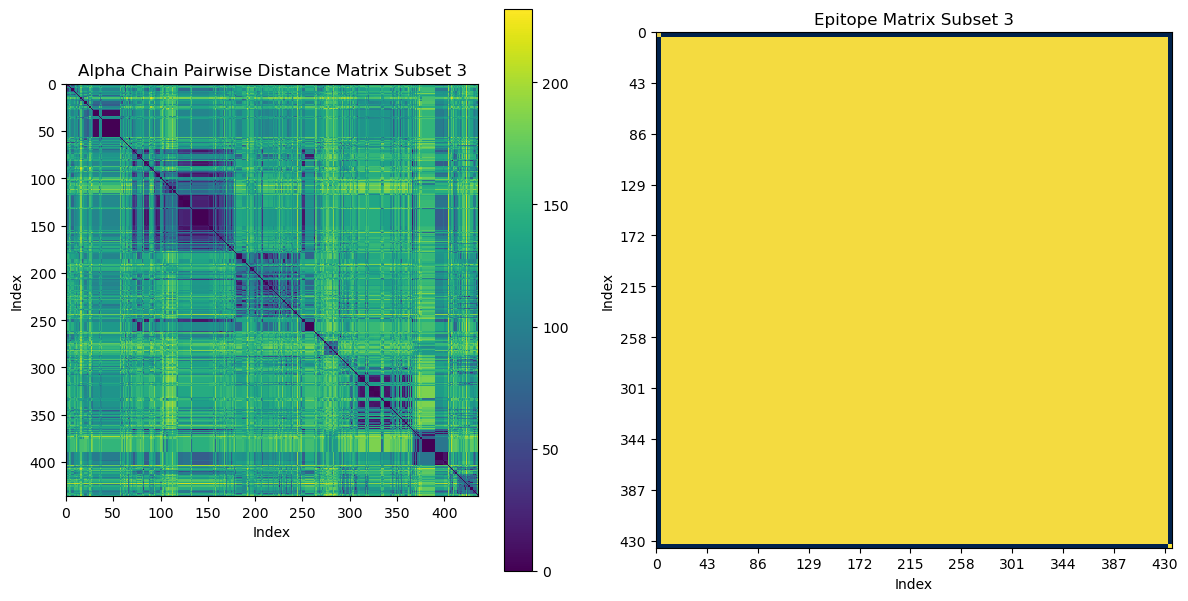

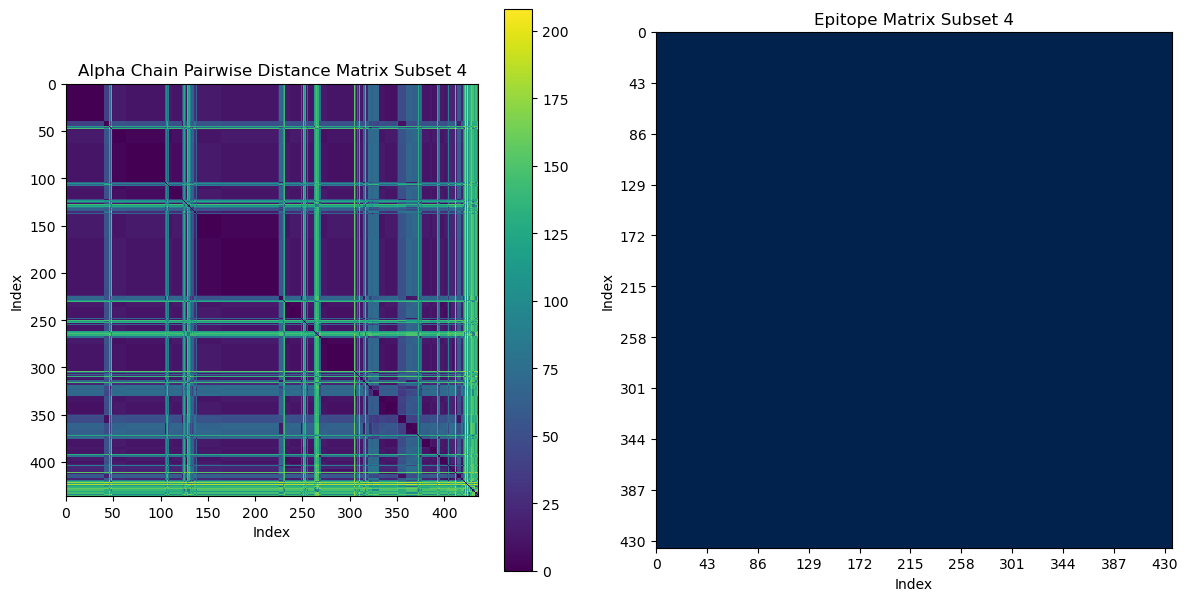

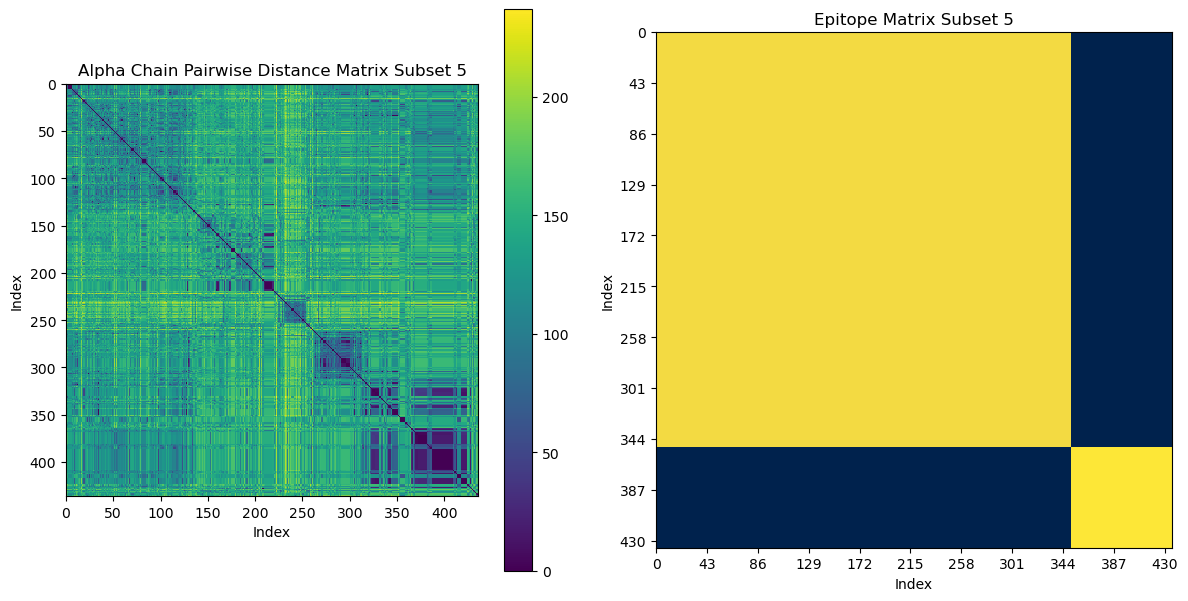

In [101]:
calculate_and_plot_subsets(mouse_alpha_01,'mouse',['alpha'], 5)

**Note: If the colors are the same in one epitope matrix, it means all the rows belong to the same epitope.**

[[20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 [20. 20. 20. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 52. 52. 52.]
 [ 0.  0.  0. ... 52. 52. 52.]
 [ 0.  0.  0. ... 52. 52. 52.]]


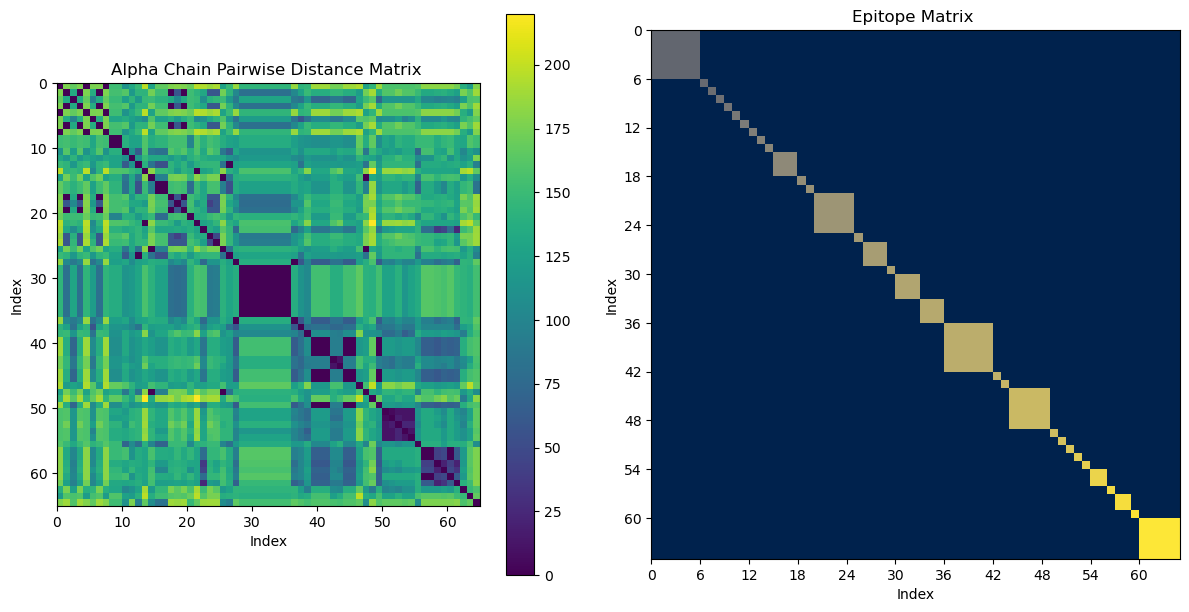

In [102]:
calculate_and_plot_subsets(mouse_alpha_23,'mouse',['alpha'], 1)

In [ ]:
calculate_and_plot_subsets(mouse_beta_01,'mouse',['beta'], 1)

In [ ]:
calculate_and_plot_subsets(mouse_beta_23,'mouse',['beta'], 1)

### 1.3.4 Pairwise

In [ ]:
calculate_and_plot_subsets(human_23,'human',['alpha','beta'], 1)

In [ ]:
calculate_and_plot_subsets(human_01,'human',['alpha','beta'], 10)

In [ ]:
calculate_and_plot_subsets(mouse_23,'mouse',['alpha','beta'], 1)

In [ ]:
calculate_and_plot_subsets(mouse_01,'mouse',['alpha','beta'], 1)

In [ ]:
# calculate_and_plot_subsets(mouse_23,'mouse',['alpha','beta'], 1)

In [ ]:
# calculate_and_plot_subsets(mouse_23,'mouse',['alpha','beta'], 1)

In [69]:
# for index, row in mouse_23[['epitope']].iterrows():
#     print(index, row['epitope'])


In [70]:
# mouse_23['epitope'].value_counts()